<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

Presentado por: Carlos Felipe Pimienta Moreno  <br>
Fecha: 19/05/2024

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes:

## Importación de librerias necesarias

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn import preprocessing
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn import tree
import pydotplus
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix


ModuleNotFoundError: No module named 'pydotplus'

## Cargar el Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Felipe-UNIR/TecnicasIA-datasets/main/Laboratorio_dataset_car.csv',sep=';')
df

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1745,low,low,5more,more,med,high,vgood
1746,low,low,5more,more,med,high,vgood
1747,low,low,5more,more,big,low,unacc
1748,low,low,5more,more,big,med,good


Número de instancias en total

In [3]:
df.shape[0]

1750

In [4]:
comprar = np.unique(df['Buying'])
print(f'Buying: {comprar}')

mantenimiento = np.unique(df['Maintenance'])
print(f'Maintenance: {mantenimiento}')

puertas = np.unique(df['Doors'])
print(f'Doors: {puertas}')

personas = np.unique(df['Person'])
print(f'Person: {personas}')

maletero = np.unique(df['lug_boot'])
print(f'lug_boot: {maletero}')

seguridad = np.unique(df['safety'])
print(f'safety: {seguridad}')

clases = np.unique(df['class'])
print(f'class: {clases}')

Buying: ['high' 'low' 'med' 'vhigh']
Maintenance: ['high' 'low' 'med' 'vhigh']
Doors: ['2' '3' '4' '5more']
Person: ['2' '4' 'more']
lug_boot: ['big' 'med' 'small']
safety: ['high' 'low' 'med']
class: ['acc' 'good' 'unacc' 'vgood']


## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [5]:
clase = df['class'].value_counts()
print (clase)

x = df[['Buying','Maintenance','Doors','Person','lug_boot','safety']].values
x[0:5]
print('Caracteristicas Originales: ',x)

class
unacc    1215
acc       390
good       75
vgood      70
Name: count, dtype: int64
Caracteristicas Originales:  [['vhigh' 'vhigh' '2' '2' 'small' 'low']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]


In [6]:
Buying = preprocessing.LabelEncoder()
Buying.fit(['low','med','high','vhigh'])
x[:,0] = Buying.transform(x[:,0])

Maintenance = preprocessing.LabelEncoder()
Maintenance.fit(['low','vhigh','high','med'])
x[:,1] = Maintenance.transform(x[:,1])

Doors = preprocessing.LabelEncoder()
Doors.fit(['2','3','4','5more'])
x[:,2] = Doors.transform(x[:,2])

Person = preprocessing.LabelEncoder()
Person.fit(['2','4','more'])
x[:,3] = Person.transform(x[:,3])

lug_boot = preprocessing.LabelEncoder()
lug_boot.fit(['small','med','big'])
x[:,4] = lug_boot.transform(x[:,4])

safety = preprocessing.LabelEncoder()
safety.fit(['low','med','high'])
x[:,5] = safety.transform(x[:,5])

x[0:5]
print('Datos procesados:\n',x)

Datos procesados:
 [[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]


In [7]:
y = df['class']
y[0:5]
print('Clases:\n',y)

Clases:
 0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1745    vgood
1746    vgood
1747    unacc
1748     good
1749    vgood
Name: class, Length: 1750, dtype: object


## Caracterización del Dataset

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


Diferentes clases, mediante el metodo unique

In [8]:
clases = np.unique(df['class'])
print(f'class: {clases}')

class: ['acc' 'good' 'unacc' 'vgood']


Tipo de dato de la clase

In [9]:
np.array(df['class']).dtype

dtype('O')

Numero de muestras por clase

In [10]:
df['class'].value_counts()

class
unacc    1215
acc       390
good       75
vgood      70
Name: count, dtype: int64

## División del dataset en datos de entrenamiento y datos de test 

Dividad entradas y clases, se considera solo la columna "class"

In [11]:
Y = df['class']

Se considera las columnas restantes

In [12]:
X = df.drop(columns=['class'])

Entrenamiento de datos

In [13]:
X_df = df
Y_df = X

Número de atributos de la entrada

In [14]:
X.describe()

,Buying,Maintenance,Doors,Person,lug_boot,safety
count,1750,1750,1750,1750,1750,1750
unique,4,4,4,3,3,3
top,vhigh,low,2,4,big,high
freq,443,447,444,587,585,590


In [15]:
x_entre, x_test, y_entre, y_test = train_test_split(x, y,test_size=0.2, random_state= 1, shuffle= True)

print('Cantidad de datos de entrenamiento: ',x_entre.shape, y_entre.shape)
print('Cantidad de datos de testeo: ',x_test.shape, y_test.shape)

Cantidad de datos de entrenamiento:  (1400, 6) (1400,)
Cantidad de datos de testeo:  (350, 6) (350,)


## Arbol de decisión CART seleccionando atributos GINI <br>

Entrenamiento

In [16]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Gini', DecisionTreeClassifier()))

In [17]:
results = []
names = []
for name, model in models:
    KFold = StratifiedKFold(n_splits=10, random_state=1, shuffle= True)
    cv_results = cross_val_score(model, x_entre, y_entre, cv=KFold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.686429 (0.023354)
Gini: 0.978571 (0.010102)


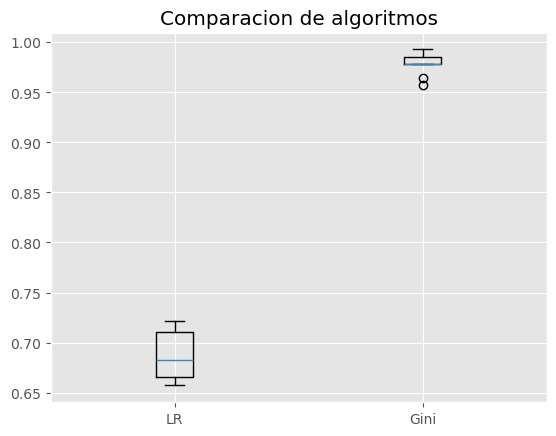

In [18]:
pyplot.boxplot(results, labels=names)
pyplot.title('Comparacion de algoritmos')
pyplot.show()

Se evalua las predicciones, se evalua la predicción obtenida

In [19]:
#arbol_gini = DecisionTreeClassifier(criterion="gini")
arbol_gini = DecisionTreeClassifier(criterion="gini", max_depth=15)
arbol_gini.fit(x_entre,y_entre)
gini_predictions = arbol_gini.predict(x_test)

print('Predicción del model:\n ',gini_predictions[0:5])
print('Valores reales:\n',y_test[0:5])

Predicción del model:
  ['good' 'unacc' 'unacc' 'unacc' 'unacc']
Valores reales:
 1704     good
1694    unacc
47      unacc
304     unacc
534     unacc
Name: class, dtype: object


Visualizacion del arbol

In [20]:
data=tree.export_graphviz(arbol_gini, out_file=None, feature_names=df.columns[0:6], class_names=np.unique(y_entre), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('ArbolGini.png')
img = pltimg.imread('ArbolGini.png')
imgplot = plt.imshow(img)
plt.show()


NameError: name 'pydotplus' is not defined

Evaluacion del modelo y observar la predicción

In [640]:
print("Presición del Arbol de Decisiciones\n",metrics.accuracy_score(y_test,gini_predictions))

Presición del Arbol de Decisiciones
 0.9771428571428571


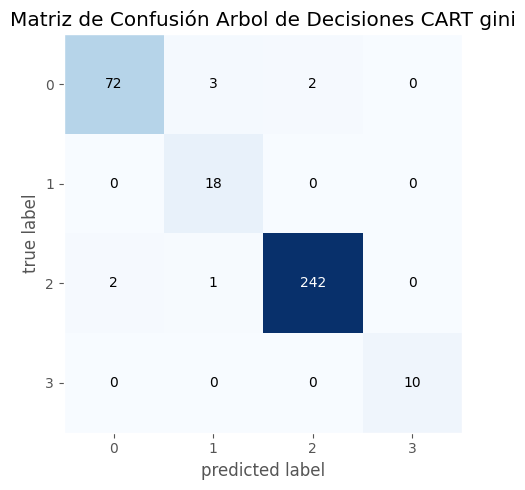

In [641]:
y_pred = arbol_gini.predict(x_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(5,5),show_normed=False)
plt.title('Matriz de Confusión Arbol de Decisiones CART gini')
plt.tight_layout()

In [642]:
print(classification_report(y_test, gini_predictions, zero_division=1))

              precision    recall  f1-score   support

         acc       0.97      0.94      0.95        77
        good       0.82      1.00      0.90        18
       unacc       0.99      0.99      0.99       245
       vgood       1.00      1.00      1.00        10

    accuracy                           0.98       350
   macro avg       0.95      0.98      0.96       350
weighted avg       0.98      0.98      0.98       350



## Arbol de decisión CART seleccionando atributos Entropy <br>

Entrenamiento

In [643]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('entropy', DecisionTreeClassifier()))

In [644]:
results = []
names = []
for name, model in models:
    KFold = StratifiedKFold(n_splits=10, random_state=1, shuffle= True)
    cv_results = cross_val_score(model, x_entre, y_entre, cv=KFold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.686429 (0.023354)
entropy: 0.977143 (0.011429)


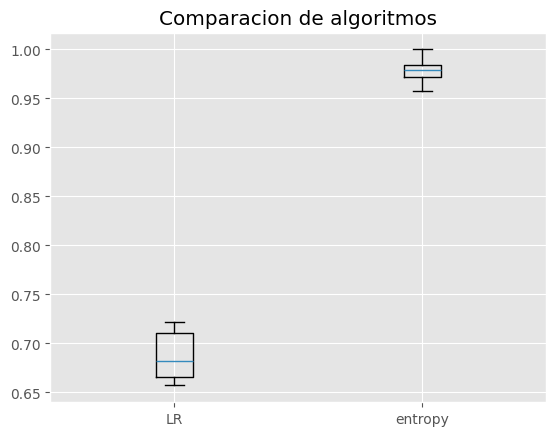

In [645]:
pyplot.boxplot(results, labels=names)
pyplot.title('Comparacion de algoritmos')
pyplot.show()

Se evalua las predicciones, se evalua la predicción obtenida

In [646]:
arbol_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=15)
arbol_entropy.fit(x_entre,y_entre)
entropy_predictions = arbol_entropy.predict(x_test)

print('Predicción del model:\n ',entropy_predictions[0:5])
print('Valores reales:\n',y_test[0:5])

Predicción del model:
  ['good' 'unacc' 'unacc' 'unacc' 'unacc']
Valores reales:
 1704     good
1694    unacc
47      unacc
304     unacc
534     unacc
Name: class, dtype: object


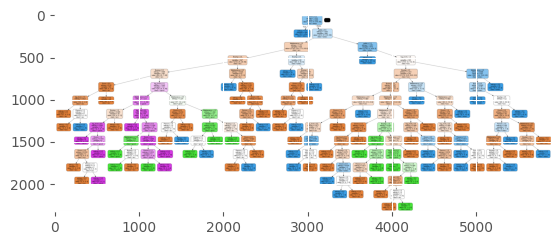

In [647]:
data=tree.export_graphviz(arbol_entropy, out_file=None, feature_names=df.columns[0:6], class_names=np.unique(y_entre), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('Arbol_Entropy.png')
img = pltimg.imread('Arbol_Entropy.png')
imgplot = plt.imshow(img)
plt.show()


Evaluacion del modelo y observar la predicción

In [648]:
print("Presición del Arbol de Decisiciones\n",metrics.accuracy_score(y_test,entropy_predictions))

Presición del Arbol de Decisiciones
 0.9885714285714285


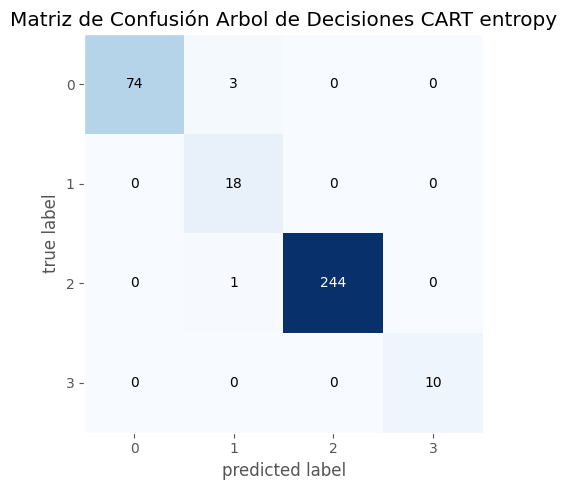

In [649]:
y_pred = arbol_entropy.predict(x_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(5,5),show_normed=False)
plt.title('Matriz de Confusión Arbol de Decisiones CART entropy')
plt.tight_layout()

In [650]:
print(classification_report(y_test, entropy_predictions, zero_division=1))

              precision    recall  f1-score   support

         acc       1.00      0.96      0.98        77
        good       0.82      1.00      0.90        18
       unacc       1.00      1.00      1.00       245
       vgood       1.00      1.00      1.00        10

    accuracy                           0.99       350
   macro avg       0.95      0.99      0.97       350
weighted avg       0.99      0.99      0.99       350



TP Rate


In [651]:
tp0 = matriz[0, 0]  # Verdadero positivos
fp0 = matriz[0, 1]  # Falsos positivos
fn0 = matriz[0, 2]  # Falsos negativos
tn0 = matriz[0, 3]  # Verdaderos negativos

fp1 = matriz[1, 0]  # Falsos positivos
tp1 = matriz[1, 1]  # Verdaderos positivos
fn1 = matriz[1, 2]  # Falsos negativos
tn1 = matriz[1, 3]  # Verdaderos negativos

fn2 = matriz[2, 0]  # Falsos negativos
fp2 = matriz[2, 1]  # Falsos positivos
tp2 = matriz[2, 2]  # Verdaderos positivo
tn2 = matriz[2, 3]  # Verdaderos negativos

tn3 = matriz[3, 0]  # Verdadero negativo
fn3 = matriz[3, 1]  # Falsos negativo
fp3 = matriz[3, 2]  # Falso positivo
tp3 = matriz[3, 3]  # Verdaderos positivo

# Calcular la especificidad
TP_Rate0 = tp0 / (tp0 + fp0 + fn0 + tn0)
TP_Rate1 = tp1 / (tp1 + fp1 + fn1 + tn1)
TP_Rate2 = tp2 / (tp2 + fp2 + fn2 + tn2)
TP_Rate3 = tp3 / (tp3 + fp3 + fn3 + tn3)

print('TP Rate Clase 0: %.6f' % TP_Rate0)
print('TP Rate Clase 1: %.6f' % TP_Rate1)
print('TP Rate Clase 2: %.6f' % TP_Rate2)
print('TP Rate Clase 3: %.6f' % TP_Rate3)

TP Rate Clase 0: 0.961039
TP Rate Clase 1: 1.000000
TP Rate Clase 2: 0.995918
TP Rate Clase 3: 1.000000


TN Rate

In [652]:
tp0 = matriz[0, 0]  # Verdadero positivos
fp0 = matriz[0, 1]  # Falsos positivos
fn0 = matriz[0, 2]  # Falsos negativos
tn0 = matriz[0, 3]  # Verdaderos negativos

fp1 = matriz[1, 0]  # Falsos positivos
tp1 = matriz[1, 1]  # Verdaderos positivos
fn1 = matriz[1, 2]  # Falsos negativos
tn1 = matriz[1, 3]  # Verdaderos negativos

fn2 = matriz[2, 0]  # Falsos negativos
fp2 = matriz[2, 1]  # Falsos positivos
tp2 = matriz[2, 2]  # Verdaderos positivo
tn2 = matriz[2, 3]  # Verdaderos negativos

tn3 = matriz[3, 0]  # Verdadero negativo
fn3 = matriz[3, 1]  # Falsos negativo
fp3 = matriz[3, 2]  # Falso positivo
tp3 = matriz[3, 3]  # Verdaderos positivo

# Calcular la especificidad
TN_Rate0 = tn0 / (tp0 + fp0 + fn0 + tn0)
TN_Rate1 = tn1 / (tp1 + fp1 + fn1 + tn1)
TN_Rate2 = tn2 / (tp2 + fp2 + fn2 + tn2)
TN_Rate3 = tn3 / (tp3 + fp3 + fn3 + tn3)

print('TN Rate Clase 0: %.6f' % TN_Rate0)
print('TN Rate Clase 1: %.6f' % TN_Rate1)
print('TN Rate Clase 2: %.6f' % TN_Rate2)
print('TN Rate Clase 3: %.6f' % TN_Rate3)

TN Rate Clase 0: 0.000000
TN Rate Clase 1: 0.000000
TN Rate Clase 2: 0.000000
TN Rate Clase 3: 0.000000


FP Rate

In [653]:
tp0 = matriz[0, 0]  # Verdadero positivos
fp0 = matriz[0, 1]  # Falsos positivos
fn0 = matriz[0, 2]  # Falsos negativos
tn0 = matriz[0, 3]  # Verdaderos negativos

fp1 = matriz[1, 0]  # Falsos positivos
tp1 = matriz[1, 1]  # Verdaderos positivos
fn1 = matriz[1, 2]  # Falsos negativos
tn1 = matriz[1, 3]  # Verdaderos negativos

fn2 = matriz[2, 0]  # Falsos negativos
fp2 = matriz[2, 1]  # Falsos positivos
tp2 = matriz[2, 2]  # Verdaderos positivo
tn2 = matriz[2, 3]  # Verdaderos negativos

tn3 = matriz[3, 0]  # Verdadero negativo
fn3 = matriz[3, 1]  # Falsos negativo
fp3 = matriz[3, 2]  # Falso positivo
tp3 = matriz[3, 3]  # Verdaderos positivo

# Calcular la especificidad
FP_Rate0 = fp0 / (tp0 + fp0 + fn0 + tn0)
FP_Rate1 = fp1 / (tp1 + fp1 + fn1 + tn1)
FP_Rate2 = fp2 / (tp2 + fp2 + fn2 + tn2)
FP_Rate3 = fp3 / (tp3 + fp3 + fn3 + tn3)

print('FP Rate Clase 0: %.6f' % FP_Rate0)
print('FP Rate Clase 1: %.6f' % FP_Rate1)
print('FP Rate Clase 2: %.6f' % FP_Rate2)
print('FP Rate Clase 3: %.6f' % FP_Rate3)

FP Rate Clase 0: 0.038961
FP Rate Clase 1: 0.000000
FP Rate Clase 2: 0.004082
FP Rate Clase 3: 0.000000


FN Rate

In [654]:
tp0 = matriz[0, 0]  # Verdadero positivos
fp0 = matriz[0, 1]  # Falsos positivos
fn0 = matriz[0, 2]  # Falsos negativos
tn0 = matriz[0, 3]  # Verdaderos negativos

fp1 = matriz[1, 0]  # Falsos positivos
tp1 = matriz[1, 1]  # Verdaderos positivos
fn1 = matriz[1, 2]  # Falsos negativos
tn1 = matriz[1, 3]  # Verdaderos negativos

fn2 = matriz[2, 0]  # Falsos negativos
fp2 = matriz[2, 1]  # Falsos positivos
tp2 = matriz[2, 2]  # Verdaderos positivo
tn2 = matriz[2, 3]  # Verdaderos negativos

tn3 = matriz[3, 0]  # Verdadero negativo
fn3 = matriz[3, 1]  # Falsos negativo
fp3 = matriz[3, 2]  # Falso positivo
tp3 = matriz[3, 3]  # Verdaderos positivo

# Calcular la especificidad
FN_Rate0 = fn0 / (tp0 + fp0 + fn0 + tn0)
FN_Rate1 = fn1 / (tp1 + fp1 + fn1 + tn1)
FN_Rate2 = fn2 / (tp2 + fp2 + fn2 + tn2)
FN_Rate3 = fn3 / (tp3 + fp3 + fn3 + tn3)

print('FN Rate Clase 0: %.6f' % FN_Rate0)
print('FN Rate Clase 1: %.6f' % FN_Rate1)
print('FN Rate Clase 2: %.6f' % FN_Rate2)
print('FN Rate Clase 3: %.6f' % FN_Rate3)

FN Rate Clase 0: 0.000000
FN Rate Clase 1: 0.000000
FN Rate Clase 2: 0.000000
FN Rate Clase 3: 0.000000


In [655]:
print('Exactitud : %.6f' % accuracy_score(y_test, y_pred))
print('Precision: %.6f' % precision_score(y_test, y_pred, average='micro'))
print('Sensibilidad : %.6f' % recall_score(y_test, y_pred, average='micro'))
print('F1: %.6f' % f1_score(y_test, y_pred, average='micro'))

Exactitud : 0.988571
Precision: 0.988571
Sensibilidad : 0.988571
F1: 0.988571


Profundidad del bosque:  5
              precision    recall  f1-score   support

         acc       0.76      0.70      0.73        77
        good       1.00      0.00      0.00        18
       unacc       0.94      0.96      0.95       245
       vgood       0.33      1.00      0.50        10

    accuracy                           0.85       350
   macro avg       0.76      0.67      0.55       350
weighted avg       0.89      0.85      0.84       350

Profundidad del bosque:  20
              precision    recall  f1-score   support

         acc       0.99      0.95      0.97        77
        good       0.82      1.00      0.90        18
       unacc       1.00      0.99      0.99       245
       vgood       1.00      1.00      1.00        10

    accuracy                           0.98       350
   macro avg       0.95      0.98      0.97       350
weighted avg       0.98      0.98      0.98       350

Profundidad del bosque:  40
              precision    recall  f1-score   s

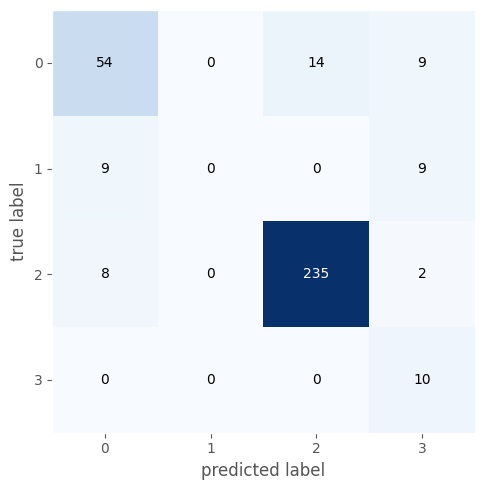

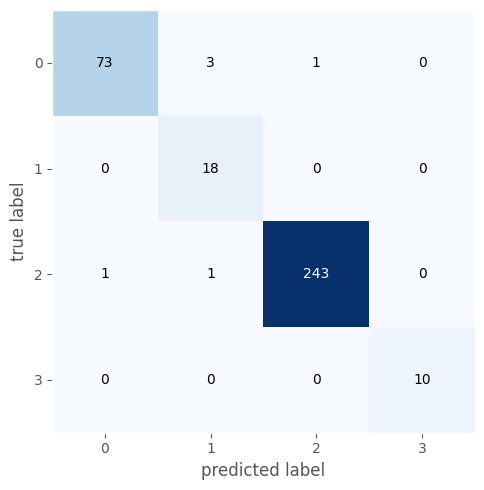

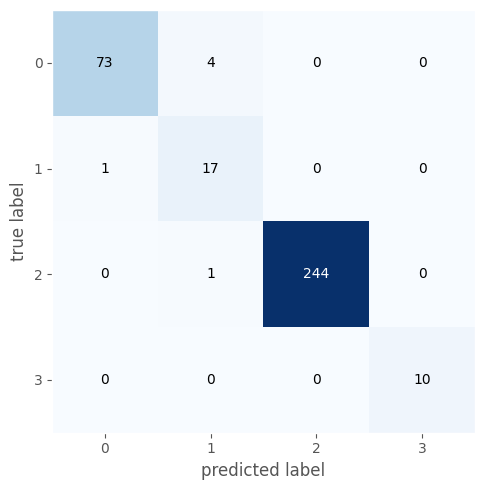

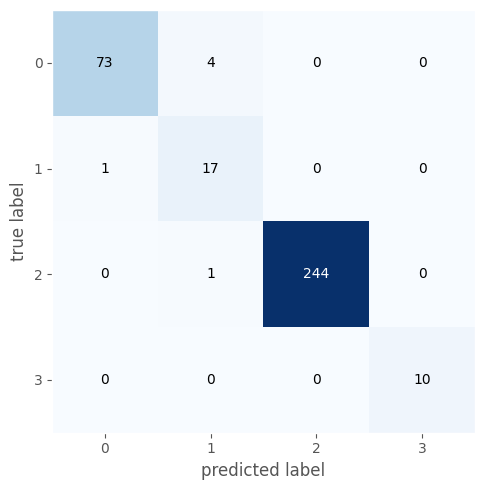

In [656]:
for profundidad in [5,20,40,80]:
    print('Profundidad del bosque: ', profundidad)
    arbol_entropy_mejorado = DecisionTreeClassifier(criterion='entropy', max_depth=profundidad)
    arbol_entropy_mejorado.fit(x_entre, y_entre)
    predictions_entropy_mejorado = arbol_entropy_mejorado.predict(x_test)
    y_pred_mejorada = arbol_entropy_mejorado.predict(x_test)
    matriz_mejorada = confusion_matrix(y_test, y_pred_mejorada)
    plot_confusion_matrix(conf_mat=matriz_mejorada, figsize=(5,5),show_normed=False)
    #plt.title('Profundidad del bosque: ', profundidad)
    plt.tight_layout()
    print(classification_report(y_test, predictions_entropy_mejorado, zero_division=1))